#Perceptron Tutorial - ML Course (Colman)

Created by [Yossi Adi](http://adiyoss.github.io/).

## Introduction

In this tutorial we will be train a binary perceptron classifier for hand digit recognition.

We will cover:

* Loading and slicing MNIST dataset
* Training and testing perceptron classifier
* Visualize our data and model

## Data loading

Let's start with loading MNIST data set. You can download it directly from: http://yann.lecun.com/exdb/mnist/, or use sklearn packge. In this tutorial we will use sklearn for dataloading.

In [3]:
from sklearn.datasets import fetch_mldata
from sklearn.utils import shuffle

# read data
mnist = fetch_mldata("MNIST original")
eta = 0.1
X, Y = mnist.data[:60000] / 255., mnist.target[:60000]
x = [ex for ex, ey in zip(X, Y) if ey == 1 or ey == 8]
# convert 1 to +1 and 8 to -1
y = [1 if ey == 1 else -1 for ex, ey in zip(X, Y) if ey == 1 or ey == 8]
# suffle examples
x, y = shuffle(x, y, random_state=1)



Let's visualize it.

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

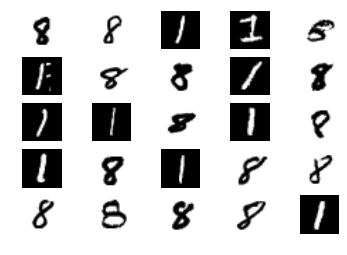

In [6]:
# show some images
plt.figure(1);
for i in range (1,26):
    ax = plt.subplot(5,5,i);
    ax.axis('off');
    if y[i] > 0:
        ax.imshow(x[i].reshape(28,28), cmap="gray");
    else:
        ax.imshow(255-x[i].reshape(28,28), cmap="gray");
plt.show();

## The perceptron algorithm

Let's first take a short reminder for the perceptron algorithm:

The original perceptron algorithm is an algorithm for supervised learning of binary classifiers, functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not. 
It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector.



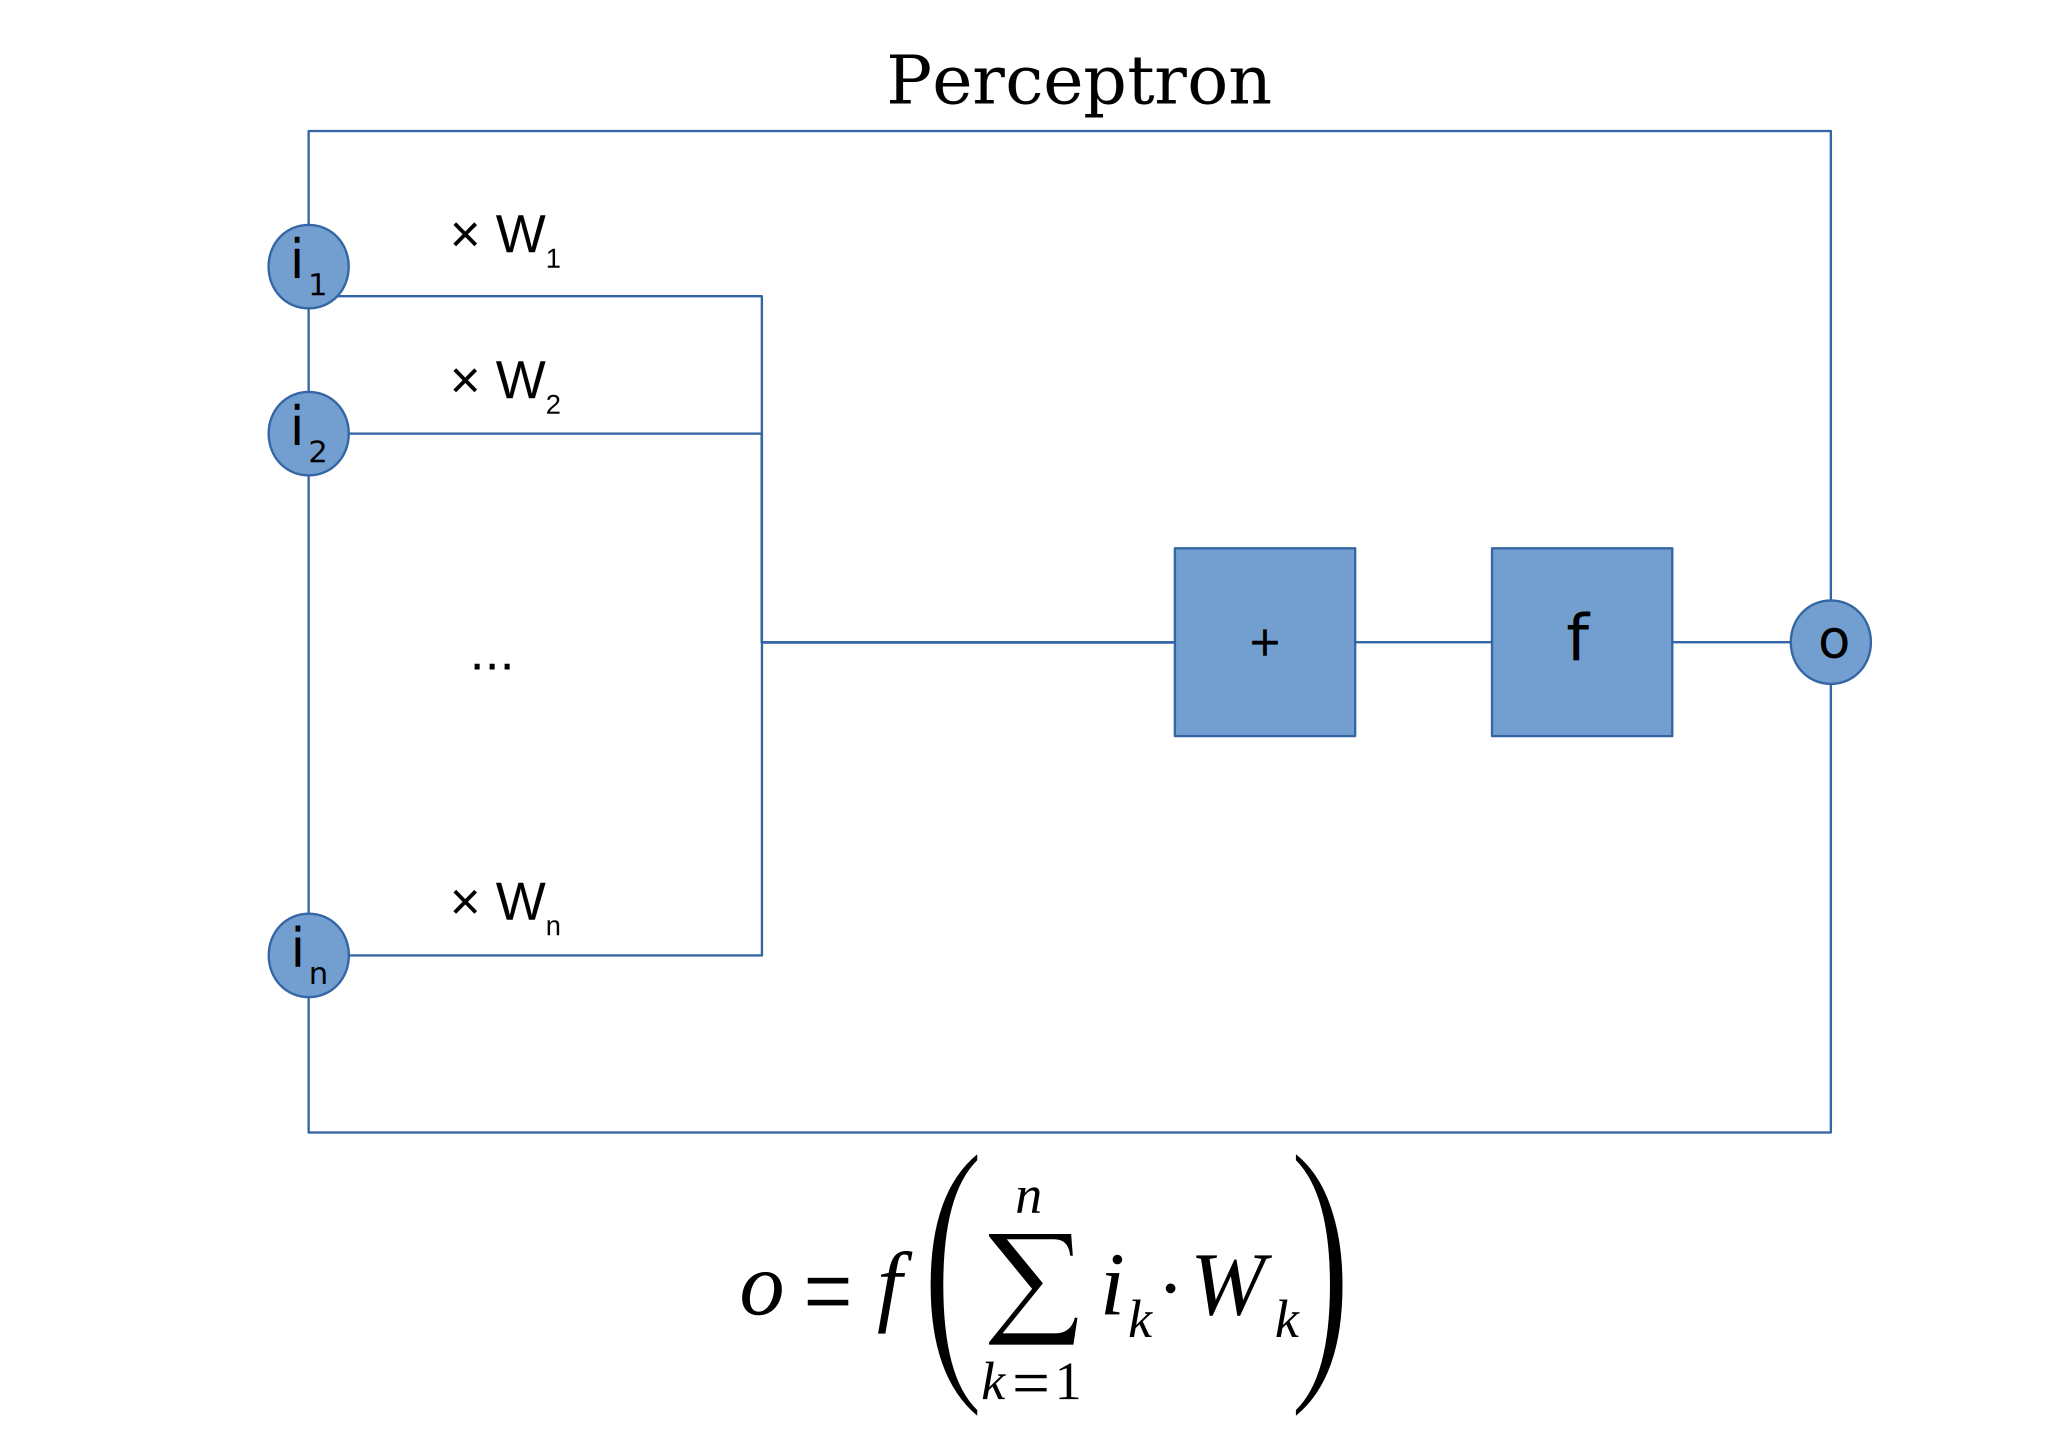

In [7]:
from IPython.display import SVG, display
display(SVG(url='https://upload.wikimedia.org/wikipedia/commons/3/31/Perceptron.svg'))

### Algorithm Reminder

* Initialize the weights and the threshold. Weights may be initialized to 0 or to a small random value. In the example below, we use 0.
* For each example j in our training set D, perform the following steps over the input $\mathbf{{x} _{j}}$, and desired output $y_{j}$,:

    * Calculate the actual output: 
        \begin{aligned}\hat{y}_{j}(t)&=f[\mathbf {w} (t)\cdot \mathbf {x} _{j}]\\&=f[w_{0}(t)x_{j,0}+w_{1}(t)x_{j,1}+w_{2}(t)x_{j,2}+\dotsb +w_{n}(t)x_{j,n}]\end{aligned}

    * Update the weights:
        \begin{aligned} w_{i}(t+1)=w_{i}(t)+\eta \cdot (y_{j}-\hat{y}_{j}(t))\cdot x_{j,i} ~ , ~for~all~features~ 0\leq i\leq n.\end{aligned}


Let's code it!

In [8]:
import numpy as np
import random

# weight vector
m = len(x)
d = len(x[0])
eta = 0.1
w = np.zeros((d,));

# Perceptron
T = 8000
for t in range(0, T):
    # choose example
    i = random.randint(0, m-1)
    # predict
    y_hat = np.sign(np.dot(w, x[i]))
    # update
    w = w + eta * (y[i] - y_hat) * x[i]
w_perceptron = w

# testing
M_perceptron = 0
for t in range(0, m):
    y_hat = np.sign(np.dot(w_perceptron, x[t]))
    if y[t] != y_hat:
        M_perceptron = M_perceptron + 1
print "perceptron err =", float(M_perceptron) / m

perceptron err = 0.0215993011991


## Model Visualization

Let's see what our model has learned so far, we will do it by visualizing the weight vector:

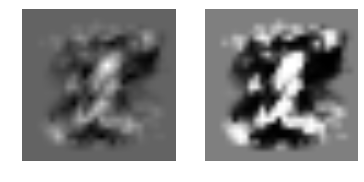

In [9]:
# show the mask learnt by Perceptron
plt.figure(2);
ax1 = plt.subplot(1,2,1);
ax1.axis('off'); # no need for axis marks
ax2 = plt.subplot(1,2,2);
ax2.axis('off'); # no need for axis marks
ax1.imshow(w_perceptron.reshape(28,28),cmap="gray");
tmp = 1/(1 + np.exp(-10 * w_perceptron / w_perceptron.max()));
ax2.imshow(tmp.reshape(28,28),cmap="gray");
plt.show();

## Testing

Now, let's test our model on a dedicated test set.

In [10]:
# check performence on test data
X, Y = mnist.data[60000:] / 255., mnist.target[60000:]
x = [ex for ex, ey in zip(X, Y) if ey == 1 or ey == 8]
# convert 1 to +1 and 8 to -1
y = [1 if ey == 1 else -1 for ex, ey in zip(X, Y) if ey == 1 or ey == 8]

m =len(x)

M_perceptron = 0
for t in range(0, m):
    y_hat = np.sign(np.dot(w_perceptron, x[t]))
    if y[t] != y_hat:
        M_perceptron = M_perceptron + 1
print "perceptron err =", float(M_perceptron) / m

perceptron err = 0.0151730678046
